In [1]:
import os
import time
import pickle
import glob
import warnings
import numpy as np
import astropy.io.fits as fits
import pyklip.fitpsf as fitpsf
import matplotlib.pylab as plt
import pyklip.instruments.MagAO as MagAO
from pyklip.klip import nan_gaussian_filter
from forwardModel import forwardModel
import GhostIsolation as ghost
import multiprocessing as mp

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import seaborn as sns
plt.rcParams['font.family'] = 'monospace'   # Fonts
plt.rcParams['font.monospace'] = 'DejaVu Sans Mono'
sns.set_context("talk")

In [4]:
import pymultinest

In [5]:
# plotting functions
def create_circular_mask(h, w, center=None, radius=None, leq=False):

    if center is None:  # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None:  # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    if leq is False:
        return dist_from_center >= radius
    else:
        return dist_from_center <= radius


def domask(img, inn=70, outt=180):
    outermask = create_circular_mask(img.shape[0], img.shape[1], radius=outt, leq=True)
    img[~outermask] = np.nanmedian(img)
    mask = create_circular_mask(img.shape[0], img.shape[1], radius=inn)
    masked_img = img.copy()
    masked_img[~mask] = np.nanmedian(img)
    return masked_img

In [6]:
platescale=7.95
platescale_err=0.10
pa_offset=-0.497
pa_uncertainty=0.192

data/27Apr18/Ha/*fits
read fits file into data
created median
Calculated ghost center is 196.9191687086391 at x=383 , y=218
returning
Parameter('x_0', value=18.0)
CUT MOF FWHM IS 3.578
CUT GAU FWHM IS 4.668335427029305 5.538421870626102
FIXED MOFFAT FWHM IS 3.578
x center is Parameter('x_0', value=15.236046309875631)
y center is Parameter('y_0', value=14.583358175662836)
Parameter('x_0', value=15.236046309875631) Parameter('y_0', value=14.583358175662836)
shift number 0
shift number 100
shift number 200
shift number 300
shift number 400
created median after shifting
Calculated ghost center is 203.77493350688314 at x=383 , y=218
returning


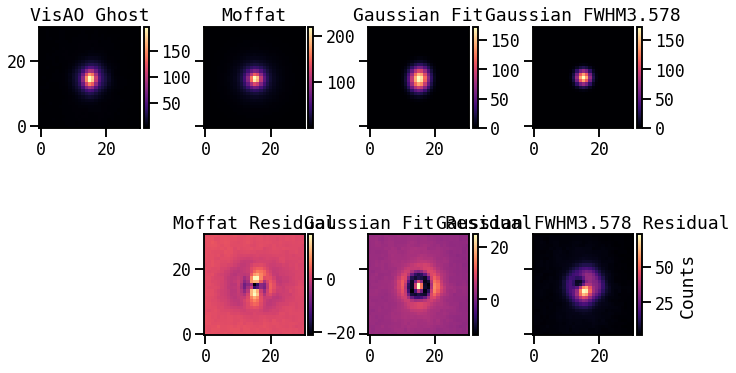

In [46]:
# loop inputs
date = '27Apr18'  # str(input('enter date in format ##Month##: '))
fwhm = 4.2  # float(input('enter dataset fwhm: '))
sep = 6  # int(input('enter sep: '))
pa = 55  # int(input('enter pa: '))
outputiwa = 3

cutsfile = False

prefixes = ['Ha']
# psfplans = [['doGhost', fwhm], ['doMoffat', fwhm],
#             ['doGaussian', fwhm]]#, ['doGs', fwhm]]
psfplans = [['doGaussian', fwhm]]
residuals = []
filepaths = []
outputdirs = []
for pref in prefixes:
    if cutsfile:
        filepath = f'data/cuts/{date}/{pref}/*fits'
    else:
        filepath = f'data/{date}/{pref}/*fits'
    outputdir = f'output/{date}/{pref}'
    filepaths.append(filepath)
    outputdirs.append(outputdir)
    
multipleGs = None#[fwhm,4.5,4,3.5]
    
# only need to do this once for each wavel
ghosts = []
moffs = []
gaussfits = []
gaussfwhms = []

if multipleGs is not None:
    gaussfwhms_list = []
    for fwhm in multipleGs:
        gaussfwhms = []
        for i in range(len(filepaths)):
            filepath = filepaths[i]
            outputdir = outputdirs[i]
            ghostdata, moffat, gaussfit, gaussfwhm, fwhm = ghost.ghostIsolation(filepath, 380, 220, 10, fwhm, 1, fwhm=fwhm)
            gaussfwhms.append(gaussfwhm)
            
        gaussfwhms_list.append(gaussfwhms)
        
else:
    for i in range(len(filepaths)):
        filepath = filepaths[i]
        outputdir = outputdirs[i]
        ghostdata, moffat, gaussfit, gaussfwhm, fwhm, smof = ghost.ghostIsolation(filepath, 380, 220, 10, fwhm, 1, fwhm=fwhm)
        try:
            plt.savefig(outputdir+'/'+'FM-psfs.png', dpi=300)
        except FileNotFoundError:
            os.makedirs(outputdir+'/')
            plt.savefig(outputdir+'/'+'FM-psfs.png', dpi=300)
        ghosts.append(ghostdata)
        moffs.append(smof)#moffat)
        gaussfits.append(gaussfit)
        gaussfwhms.append(gaussfwhm)

doGaussian
m2a[0, 9]KL10mnumba100
reading data, num files:  500
Parameters set, ready to begin forward modeling... 
saving files to: .\output/27Apr18/Ha
instrumental PSF FWHM is: 3.578
fm_class ready for KLIP
Begin align and scale images for each wavelength
Align and scale finished
Starting KLIP for sector 1/1 with an area of 254.46900494077323 pix^2
Time spent on last sector: 0s
Time spent since beginning: 0s
First sector: Can't predict remaining time
 74.60% of sector, 74.60% of total completedless than 1 reference PSFs available for minmove=2, skipping...
less than 1 reference PSFs available for minmove=2, skipping...
less than 1 reference PSFs available for minmove=2, skipping...
less than 1 reference PSFs available for minmove=2, skipping...
 75.00% of sector, 75.00% of total completedless than 1 reference PSFs available for minmove=2, skipping...
less than 1 reference PSFs available for minmove=2, skipping...
less than 1 reference PSFs available for minmove=2, skipping...
less th

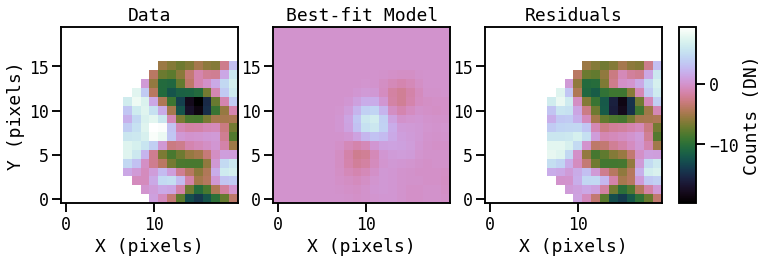

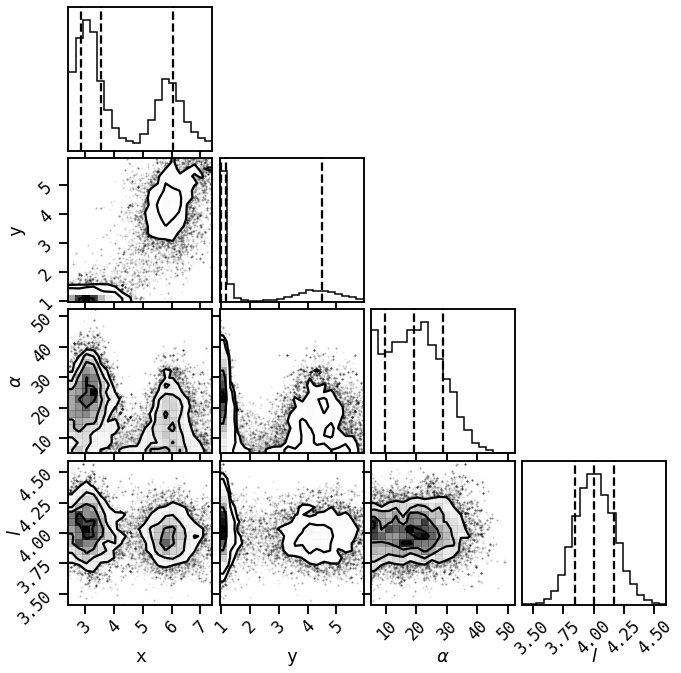

created PE module
generated FM \& data stamps
set kernel
set bounds
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    4
 *****************************************************

 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            2  of mode            1  is converging towards the edge of the prior.
 ln(ev)=  -106.83362

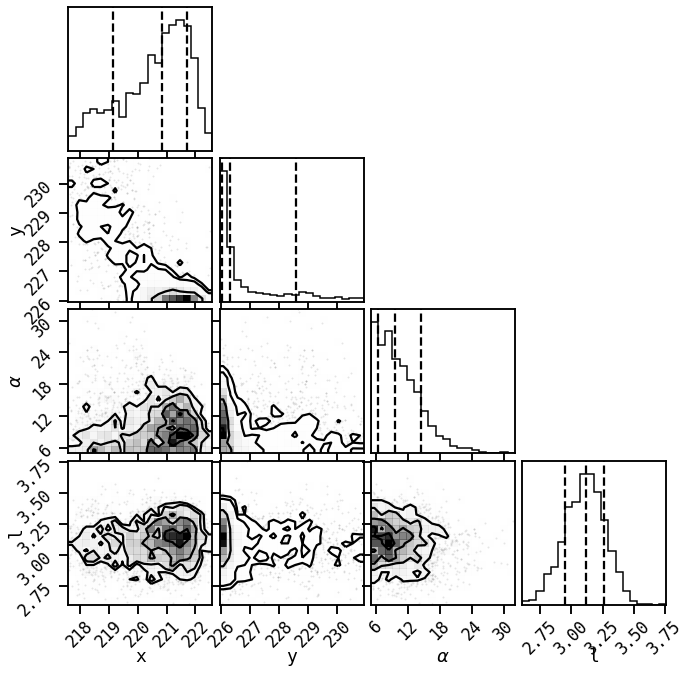

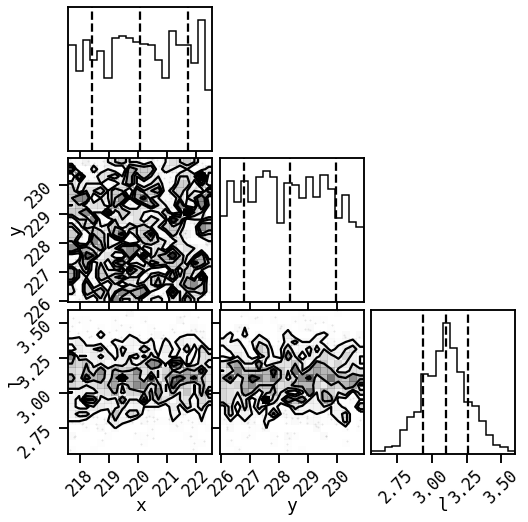

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

evidence ratio is:  -0.2829  >5 is strong evidence
SNR from data stamp residuals: 0.4751952218939209


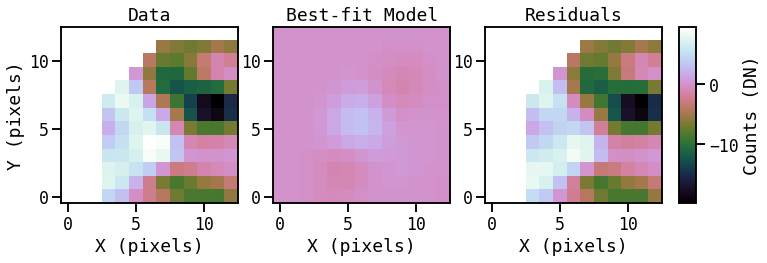

In [47]:
if multipleGs is not None:
    psfplans = []
    for i in range(len(multipleGs)):
        fwhm = multipleGs[i]
        psfs = gaussfwhms_list[i]
        plan = ['doGs',fwhm,psfs]
        psfplans.append(plan)

residuals = []
for instpsf in psfplans:
    PSFpath = instpsf[0]
    print(PSFpath)
    if PSFpath == 'doGaussian':
        outside_psfs = gaussfwhms
        FWHM = fwhm
    if PSFpath == 'doGs':
        outside_psfs = instpsf[2]
        PSFpath = 'doGaussian'
        FWHM = fwhm
    elif PSFpath == 'doGaussFit':
        outside_psfs = gaussfits
        FWHM = instpsf[1]
    elif PSFpath == 'doMoffat':
        outside_psfs = moffs
        FWHM = instpsf[1]
    elif PSFpath == 'doGhost':
        outside_psfs = ghosts
        FWHM = instpsf[1]
    
    # parameters
    KLmode = 10
    numbasis = 100 # KLmode
    contrast = 1e-2
    cc_a = 25
    iwa = 3
    ann1 = iwa # w = (owa-iwa)/cc_a, where owa = 225.5 and iwa = defined by jea
    ann2 = int(ann1 +((225.5-iwa)/cc_a)) # inner bound = IWA, outer bound = IWA + w
    an = [ann1, ann2]
    an2 = [ann1, ann2]
    move = 2
    scale = 1
    smooth = 1 #None

    global params
    params = 'm'+str(move)+'a'+str(an)+'KL'+str(KLmode)+'mnumba'+str(numbasis)
    print(params)
    cores = mp.cpu_count()
    highpass = 4 #1.5*FWHM

    # run
    for i in range(len(filepaths)):
        filepath = filepaths[i]
        outputdir = outputdirs[i]
        prefix = prefixes[i]
        outside_psf = outside_psfs[i]
        fm = forwardModel(filepath, outputdir, prefix, KLmode, sep, pa, contrast, an, move, scale, ePSF=PSFpath, FWHM=FWHM, cores=cores, highpass=highpass, numbasis=numbasis, outside_psf=outside_psf)
        fm.prep_KLIP()
        fm.run_KLIP()

        output_prefix = outputdir+'/'
        # move image
        try:
            from shutil import move, copy
            src = output_prefix + prefix + "-fmpsf-KLmodes-all.fits"
            dest = src.replace(prefix + "-fmpsf-KLmodes-all.fits", PSFpath+'/'+prefix+str(FWHM)+'-fmpsf-KLmodes-all.fits')
            try:
                move(src, dest)
            except OSError:
                copy(src, dest)
            src = output_prefix + prefix + "-klipped-KLmodes-all.fits"
            dest = src.replace(prefix + "-klipped-KLmodes-all.fits", PSFpath+'/'+prefix+str(FWHM)+'-klipped-KLmodes-all.fits')
            move(src, dest)
        except FileNotFoundError:
            src = output_prefix + prefix + "-fmpsf-KLmodes-all.fits"
            os.mkdir(src.replace(prefix + "-fmpsf-KLmodes-all.fits", '/'+PSFpath+'/'))
            dest = src.replace(prefix + "-fmpsf-KLmodes-all.fits", PSFpath+'/'+prefix+str(FWHM)+'-fmpsf-KLmodes-all.fits')
            os.rename(src, dest)
            src = output_prefix + prefix + "-klipped-KLmodes-all.fits"
            dest = src.replace(prefix + "-klipped-KLmodes-all.fits", PSFpath+'/'+prefix+str(FWHM)+'-klipped-KLmodes-all.fits')
            os.rename(src, dest)
        output_prefix_orig = output_prefix
        output_prefix = os.path.join(output_prefix, PSFpath)
        output_prefix = output_prefix+'/'+prefix+str(FWHM)
        print(output_prefix)
        
        length = 2.5  # guess here also

        # set some boundaries for your MCMC
        x_range = 2.5  # in pixels, anywhere from 1.5-5 is reasonable
        y_range = 2.5  # same as x
        flux_range = [5,200] # flux can vary by an order of magnitude
        corr_len_range = 2.5  # between 0.3 and 30

        # output to save chain to
        pklout = outputdir+'/'+prefix+PSFpath.replace('do', '')+str(FWHM)+'_chain.pkl'

        # get FM frame
        fm_frame = fits.getdata(output_prefix + "-fmpsf-KLmodes-all.fits")[0]
        fm_header = fits.getheader(output_prefix + "-fmpsf-KLmodes-all.fits")
        if smooth:
            print('smoothing!')
            fm_frame = nan_gaussian_filter(fm_frame, smooth)
        fm_centx = fm_header['PSFCENTX']
        fm_centy = fm_header['PSFCENTY']

        # get data_stamp frame
        data_frame = fits.getdata(output_prefix + "-klipped-KLmodes-all.fits")[0]
        if outputiwa is not None:
            data_frame = domask(data_frame, inn=outputiwa, outt=451)
        data_header = fits.getheader(output_prefix + "-klipped-KLmodes-all.fits")
        if smooth:
            data_frame = nan_gaussian_filter(data_frame, smooth)
        data_centx = data_header['PSFCENTX']
        data_centy = data_header['PSFCENTY']

        # and finally some parameters for the MCMC run
        nwalkers = 8

        nburn = 500
        nsteps = 5000

        # get initial guesses. Should be in the header but aren't?
        guesssep = sep
        guesspa = pa

        # create FM Astrometry object - 13 is fitboxsize
        fma = fitpsf.FMAstrometry(guesssep, guesspa, 20)

        # generate FM stamp
        # padding should be greater than 0 so we don't run into interpolation problems
        fma.generate_fm_stamp(fm_frame, [fm_centx, fm_centy], padding=5)

        # generate data_stamp stamp
        # note that dr=4 means we are using a 4 pixel wide annulus to sample the noise for each pixel
        # exclusion_radius excludes all pixels less than that distance from the estimated location of the planet
        fma.generate_data_stamp(data_frame, [data_centx, data_centy], dr=4, exclusion_radius=3)

        # set kernel, no read noise
        corr_len_guess = length
        corr_len_label = r"$l$"
        fma.set_kernel("matern32", [corr_len_guess], [corr_len_label])

        # set bounds based on given boundaries
        fma.set_bounds(x_range, y_range, flux_range, [corr_len_range])

        t0 = time.time()

        # run MCMC fit
        fma.fit_astrometry(nwalkers=nwalkers, nburn=nburn, nsteps=nsteps, numthreads=cores, chain_output=pklout)

        t1 = time.time()
        print("time taken: ", str(np.round(t1-t0)), " seconds")

        fma.propogate_errs(star_center_err=0.1, platescale=platescale, platescale_err=platescale_err, pa_offset=pa_offset, pa_uncertainty=pa_uncertainty)
        # And third is the model comparison and residuals
        fig = fma.best_fit_and_residuals()
        plt.savefig(output_prefix+'_BKA_residuals'+PSFpath.replace('do',str(FWHM))+'.png', transparent=True, dpi=300)
        plt.show()
        fig = fma.make_corner_plot()
        plt.savefig(output_prefix+'_BKA_corner'+PSFpath.replace('do',str(FWHM))+'.png', transparent=True, dpi=300)
        plt.show()
        
        # create Planet Evidence Module
        global fit
        fit = fitpsf.PlanetEvidence(sep, pa, 13, output_prefix)
        print('created PE module')
        
        # generate FM stamp
        # padding should be greater than 0 so we don't run into interpolation problems
        fit.generate_fm_stamp(fm_frame, [fm_centx, fm_centy], padding=5)

        # generate data_stamp stamp
        # not that dr=4 means we are using a 4 pixel wide annulus to sample the noise for each pixel
        # exclusion_radius excludes all pixels less than that distance from the estimated location of the planet
        fit.generate_data_stamp(data_frame, [data_centx, data_centy], dr=3, exclusion_radius=5)
        print('generated FM \& data stamps')
        # set kernel, no read noise
        corr_len_guess = 3.
        corr_len_label = r"$l$"
        fit.set_kernel("matern32", [corr_len_guess], [corr_len_label])
        print('set kernel')
        fit.set_bounds(x_range, y_range, flux_range, [corr_len_range])
        print('set bounds')
        #Run the pymultinest fit
        fit.multifit()
        print('ran fit')
        global corn, nullcorn
        
        
        corn, nullcorn = fit.fit_plots()
        plt.show()
        corn
        plt.savefig(output_prefix+'_evidence_corner'+PSFpath.replace('do',str(FWHM))+'.png', transparent=True, dpi=300)
        plt.show()
        nullcorn
        plt.savefig(output_prefix+'_null_corner'+PSFpath.replace('do',str(FWHM))+'.png', transparent=True, dpi=300)
        plt.show()
        
        evidence = fit.fit_stats()
        
        #Forward model evidence
        fm_evidence = evidence[0]['nested sampling global log-evidence']
        #forward model parameter distributions, containing the median and percentiles for each
        fm_posteriors = evidence[0]['marginals']

        #Null model evidence
        null_evidence = evidence[1]['nested sampling global log-evidence']
        #null parameter distributions, containing the median and percentiles for each
        null_posteriors = evidence[1]['marginals']
        global evidence_ratio
        evidence_ratio = np.exp(fm_evidence)/np.exp(null_evidence)
        
        print('evidence ratio is: ',round(np.log(evidence_ratio), 4),' >5 is strong evidence')
        global snr
        residnfig, snr = fit.fm_residuals()
        residfig = residnfig
        residfig
#         plt.savefig(output_prefix+'_BKA_residuals'+PSFpath.replace('do',str(FWHM))+'.png', transparent=True, dpi=300)
        

# pull in gaussian data & get final fm info

In [11]:
import glob
nights = glob.glob('output/'+date+'/')
# psfs = ['Ghost', 'Moffat','Gaussian']
psfs = ['Gaussian']
for night in nights:
    pikls = []
    for psf in psfs:
        pikl = glob.glob(night+prefixes[0]+'/*'+psf+'*.pkl')
        for peesef in pikl:
            pikls.append(peesef)
    print(pikls)
    
# We load in the results of the MCMC from the compressed pickle file
# the pyklip code has generated for us
import pandas as pd
chains = []
for pklout in pikls:
    print(pklout)
    chain = pickle.load(open(pklout, "rb"))
    chains.append(chain)
    print(chain.shape)
chain_info_ra = chains[0][:,:,0].ravel()
chain_info_dec = chains[0][:,:,1].ravel()
chain_info_alpha = chains[0][:,:,2].ravel()
chain_info_l = chains[0][:,:,3].ravel()
for chain in chains[1:]:
    chain_info_ra = np.append(chain[:,:,0].ravel(), chain_info_ra)
    chain_info_dec = np.append(chain[:,:,1].ravel(), chain_info_dec)
    chain_info_alpha = np.append(chain[:,:,2].ravel(), chain_info_alpha)
    chain_info_l = np.append(chain[:,:,3].ravel(), chain_info_l)

post = pd.DataFrame(columns=['ra', 'dec', 'alpha', 'l'])
post['ra'] = chain_info_ra-225
post['dec'] = chain_info_dec-225
post['alpha'] = chain_info_alpha
post['l'] = chain_info_l

class ParamRange(object):
    """
    Stores the best fit value and uncertainities for a parameter in a neat fasion

    Args:
        bestfit (float): the bestfit value
        err_range: either a float or a 2-element tuple (+val1, -val2) and gives the 1-sigma range

    Attributes:
        bestfit (float): the bestfit value
        error (float): the average 1-sigma error
        error_2sided (np.array): [+error1, -error2] 2-element array with asymmetric errors
    """
    def __init__(self, bestfit, err_range):
        self.bestfit = bestfit

        if isinstance(err_range, (int, float)):
            self.error = err_range
            self.error_2sided = np.array([err_range, -err_range])
        elif len(err_range) == 2:
            self.error_2sided = np.array(err_range)
            self.error = np.mean(np.abs(err_range))
            
import astropy.stats.circstats as circstats
x_fit = post['ra'].to_numpy()
y_fit = post['dec'].to_numpy()
x_best = np.median(post['ra'])
y_best = np.median(post['dec'])
x_1sigma_raw = np.percentile(post['ra'], [84,16]) - np.median(post['ra'])
y_1sigma_raw = np.percentile(post['dec'], [84,16]) - np.median(post['dec'])

# print("Raw X/Y Centroid = ({0}, {1}) with statistical error of {2} pix in X and {3} pix in Y".format(x_best, y_best, x_1sigma_raw, y_1sigma_raw))

# calculate sep and pa from x/y separation
sep_fit = np.sqrt((x_fit)**2 + (y_fit)**2)
# For PA compute mean using circstats package, find delta_pa between all points and the mean,
# then compute median/precentiles
pa_fit = (np.arctan2(y_fit, x_fit) - (np.pi/2.0)) % (2.0*np.pi) # Radians!
# for Bayesian, convert the chains to sep/pa to get uncertainity
pa_mean = circstats.circmean(pa_fit - np.pi) + np.pi # Circmean [-pi, pi]
d_pa = np.arctan2(np.sin(pa_fit-pa_mean), np.cos(pa_fit-pa_mean))
pa_median = np.median(d_pa) + pa_mean
pa_percentile = np.nanpercentile(d_pa, [84,16])  - np.median(d_pa) # median of d_pa should be small
pa_fit = np.degrees(pa_fit) # Convert to degrees

# calculate sep and pa statistical errors
sep_best = np.median(sep_fit)
pa_best = np.degrees(pa_median)
sep_1sigma_raw = (np.percentile(sep_fit, [84,16]) - sep_best)
pa_1sigma_raw = np.degrees(pa_percentile)

# print("Raw Sep/PA Centroid = ({0}, {1}) with statistical error of {2} pix in Sep and {3} pix in PA".format(sep_best, pa_best, sep_1sigma_raw, pa_1sigma_raw))

# store the raw sep and PA values
raw_sep = ParamRange(sep_best, sep_1sigma_raw)
raw_PA = ParamRange(pa_best, pa_1sigma_raw)

star_center_err = 0.1

sep_err_pix = (sep_1sigma_raw**2) + star_center_err**2
sep_err_pix = np.sqrt(sep_err_pix)

sep_err_mas = np.sqrt((sep_err_pix * platescale)**2 + (platescale_err * sep_best)**2)

pa_fit = np.radians((pa_fit + pa_offset) % 360) # Convert back to radians for circstats
pa_mean = circstats.circmean(pa_fit - np.pi) + np.pi # Circmean [-pi, pi]
d_pa = np.arctan2(np.sin(pa_fit-pa_mean), np.cos(pa_fit-pa_mean))

pa_median = np.median(d_pa) + pa_mean
pa_best = np.degrees(pa_median)

pa_fit = np.degrees(pa_fit) # Convert back to degrees

pa_err = np.radians(pa_1sigma_raw)**2 + (star_center_err/sep_best)**2 + np.radians(pa_uncertainty)**2
pa_err = np.sqrt(pa_err)
pa_err_deg = np.degrees(pa_err)

sep_err_pix_avg = np.mean(np.abs(sep_err_pix))
pa_err_deg_avg = np.mean(np.abs(pa_err_deg))

# print("Sep = {0} +/- {1} ({2}) pix, PA = {3} +/- {4} ({5}) degrees".format(sep_best, sep_err_pix_avg, sep_err_pix, pa_best, pa_err_deg_avg, pa_err_deg))

sep = ParamRange(sep_best, sep_err_pix)
PA = ParamRange(pa_best, pa_err_deg)

sep_err_mas_avg = np.mean(np.abs(sep_err_mas))
# print("Sep = {0} +/- {1} ({2}) mas, PA = {3} +/- {4} ({5}) degrees".format(sep_best*platescale, sep_err_mas_avg, sep_err_mas, pa_best, pa_err_deg_avg, pa_err_deg))
# overwrite sep values with values converted to milliarcseconds
sep = ParamRange(sep_best*platescale, sep_err_mas)

result = pd.DataFrame(index=[date])
result['sep'] = [sep.bestfit]
result['seperr'] = [sep.error]
result['sepweight'] = [1/sep.error**2]
result['pa'] = [PA.bestfit]
result['paerr'] = [PA.error]
result['paweight'] = [1/PA.error**2]
result['alpha'] = [np.nanmedian(post['alpha'])]
result['alphaerr'] = [np.nanstd(post['alpha'])]
result['log evidence_ratio'] = np.log(evidence_ratio)
result['SNR'] = snr
result['params'] = params
result

['output/27Apr18/Cont/ContGaussian3.61_chain.pkl']
output/27Apr18/Cont/ContGaussian3.61_chain.pkl
(8, 5000, 4)


,sep,seperr,sepweight,pa,paerr,paweight,alpha,alphaerr,log evidence_ratio,SNR,params
27Apr18,41.456476,1.858355,0.289563,61.218216,2.054803,0.236843,15.913113,2.753108,16.196299,2.487946,"m2a[3, 11]KL10mnumba100"


In [30]:
result.to_clipboard()

# SNR calc

In [26]:
from SNRMap_new import *

In [34]:
output_prefix

'output/27Apr18/Cont/doGaussian/Cont3.61'

In [43]:
planetData = ([sep],[pa],[4,4])
data_frame = fits.getdata(output_prefix + "-klipped-KLmodes-all.fits")[0]
# data_frame = nan_gaussian_filter(data_frame, smooth)
test = create_map(data_frame, fwhm, planets=planetData, saveOutput=False, outputName='test')

2.410660376203855


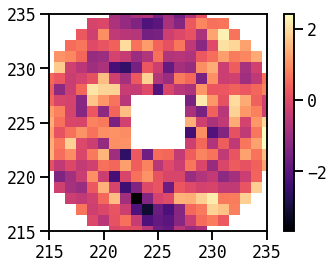

In [44]:
plt.imshow(test[0][0][0], cmap='magma')
plt.xlim(215,235)
plt.ylim(215,235)
plt.colorbar()
print(np.nanmax(test[0][0][0]))

3.449239981889912


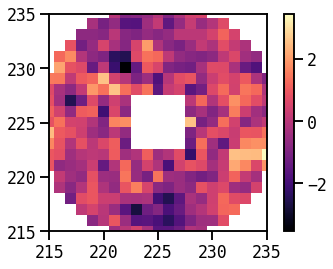

In [45]:
planetData = ([sep],[pa],[4,4])
data_frame = fits.getdata('output/27Apr18/Ha/doGaussian/Ha3.578-klipped-KLmodes-all.fits')[0]
# data_frame = nan_gaussian_filter(data_frame, smooth)
test2 = create_map(data_frame, fwhm, planets=planetData, saveOutput=False, outputName='test')
plt.imshow(test2[0][0][0], cmap='magma')
plt.xlim(215,235)
plt.ylim(215,235)
plt.colorbar()
print(np.nanmax(test2[0][0][0]))

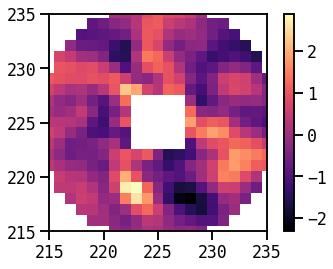

In [42]:
plt.imshow(test2[0][0][0]-test[0][0][0], cmap='magma')
plt.xlim(215,235)
plt.ylim(215,235)
plt.colorbar()


# SDI image

In [30]:
scalefactordict = {'11Apr13':0.98,'8Apr14':1.19,'8Apr14_long':0.88,
                   '15May15':1.16, '16May15':1.18, '18May15':1.22,
                   '10Feb17':1.82, '27Apr18':1.22}

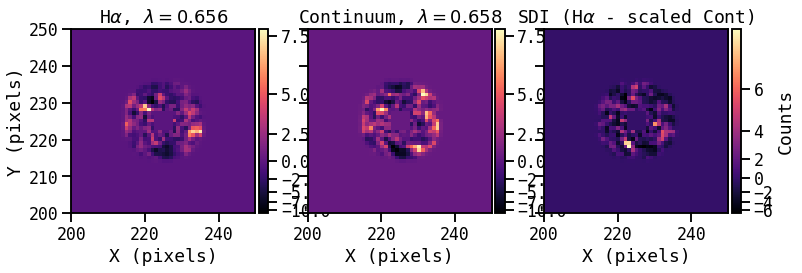

In [33]:
if 'Cont' in output_prefix_orig:
    cont = fits.getdata(glob.glob(output_prefix_orig+'/doGaussian/*-klipped*.fits')[0])[0]
    line = fits.getdata(glob.glob(output_prefix_orig.replace('Cont', 'Ha')+'/doGaussian/*-klipped*.fits')[0])[0]
elif 'Ha' in output_prefix_orig:
    line = fits.getdata(glob.glob(output_prefix_orig+'/doGaussian/*-klipped*.fits')[0])[0]
    cont = fits.getdata(glob.glob(output_prefix_orig.replace('Ha', 'Cont')+'/doGaussian/*-klipped*.fits')[0])[0]
    

line[np.isnan(line)] = np.nanmedian(line)
cont[np.isnan(cont)] = np.nanmedian(cont)

inner = 3

line = domask(nan_gaussian_filter(line, 0.5), inn=inner)
cont = domask(nan_gaussian_filter(cont, 0.5), inn=inner)

scale = 1#scalefactordict[date]

n2 = line.max()

import matplotlib
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import LogStretch, SinhStretch
from astropy.visualization.mpl_normalize import ImageNormalize

fig = plt.figure(figsize=(12, 4))

# make residual map
residual_map = (line)-(cont*scale)
residual_map = residual_map#/np.nanstd(residual_map)

# normalize all images to same scale
colornorm = matplotlib.colors.Normalize(vmin=np.nanpercentile(line, 0.03),
                                        vmax=np.nanpercentile(line, 99.7))

# plot the data_stamp
ax1 = fig.add_subplot(131)
im1 = ax1.imshow(line, interpolation='nearest', cmap='magma', norm=ImageNormalize(stretch=SinhStretch()))
ax1.invert_yaxis()
ax1.set_title(r"H$\alpha$, $\lambda=0.656$")
ax1.set_xlabel("X (pixels)")
ax1.set_ylabel("Y (pixels)")
ax1.set_xlim(200,250)
ax1.set_ylim(200,250)
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("right", size="5%", pad=0.05)
cb1 = fig.colorbar(im1, cax=cax1)#, ticks=[-500, 0, 500])

ax2 = fig.add_subplot(132)
im2 = ax2.imshow(cont, interpolation='nearest', cmap='magma', norm=ImageNormalize(stretch=SinhStretch()))
ax2.invert_yaxis()
ax2.set(yticklabels=[])
ax2.set_title(r"Continuum, $\lambda=0.658$")
ax2.set_xlabel("X (pixels)")
ax2.set_xlim(200,250)
ax2.set_ylim(200,250)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("right", size="5%", pad=0.05)
cb2 = fig.colorbar(im1, cax=cax2)#, ticks=[-500, 0, 500])

ax3 = fig.add_subplot(133)
im3 = ax3.imshow(residual_map, interpolation='nearest', cmap='magma', norm=ImageNormalize(stretch=SinhStretch()))#, vmin=-n2, vmax=n2)
ax3.invert_yaxis()
ax3.set(yticklabels=[])
ax3.set_title(r"SDI (H$\alpha$ - scaled Cont)")
ax3.set_xlabel("X (pixels)")
ax3.set_xlim(200,250)
ax3.set_ylim(200,250)

divider = make_axes_locatable(ax3)
cax3 = divider.append_axes("right", size="5%", pad=0.05)
cb3 = fig.colorbar(im3, cax=cax3)#, ticks=[-n2, 0, n2])
cb3.set_label("Counts")

# plt.savefig(outputdir+'/SDI'+PSFpath.replace('do',str(FWHM))+'.png', transparent=True, dpi=300)

In [11]:
residual_map = residual_map[200:250,200:250]

(15.0, 23.0)

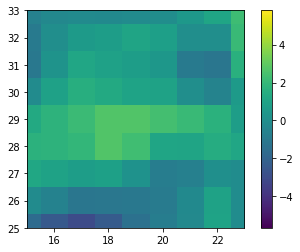

In [18]:
residual_map[residual_map==0] = np.nan
plt.imshow(residual_map, origin='lower')
plt.colorbar()
plt.ylim(25,33)
plt.xlim(15,23)

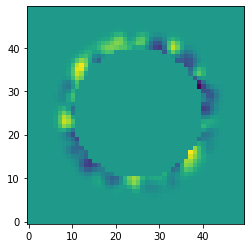

In [26]:
plt.imshow(domask(residual_map, inn=15), origin='lower')

In [27]:
np.nanstd(domask(residual_map, inn=15))

0.38876345745903645

In [28]:
inner = 15
y0,y1 = 25,33
x0,x1 = 15,23

In [29]:
print('ASDI SNR is...',str(np.nanmax(residual_map[y0:y1,x0:x1])/np.nanstd(domask(residual_map, inn=inner))))

ASDI SNR is... 6.964339206587174
